# Importing the Necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
Y=df['Outcome']
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
X.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<AxesSubplot:>

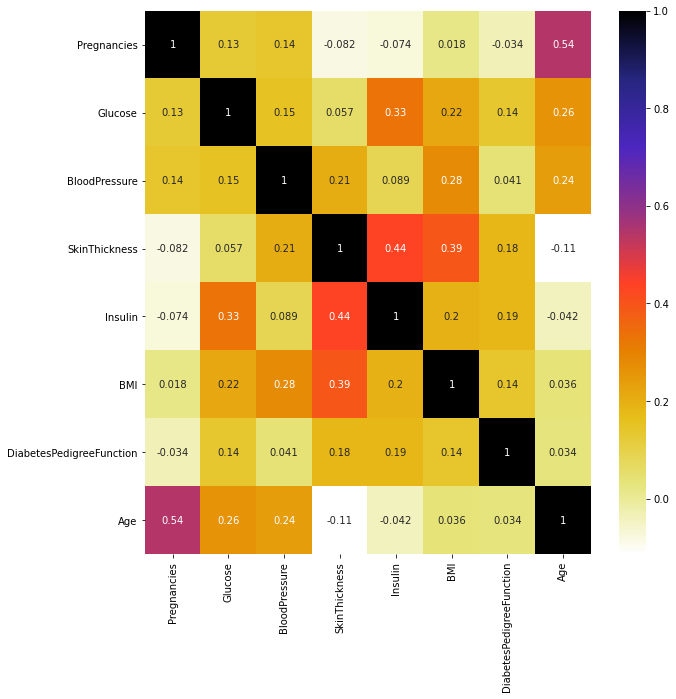

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [10]:
for i in X.columns:
    if i!='Pregnancies':
        X[i]=X[i].replace(0,round(X[i].median()))

In [11]:
for i in X.columns:
    print(X[i].min())

0
44
24
7
14
18.2
0.078
21


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,30,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,72,23,30,30.0,0.183,38


# Model Building

1.LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train,Y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [15]:
lr_pred=lr.predict(X_test)

In [16]:
lr_pred.shape

(154,)

2.RandomForest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,Y_train)
rf_pred=rf.predict(X_test)
rf_pred.shape

(154,)

3.KNeighborsClassifier(KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn_pred=knn.predict(X_test)

4.Naive-Based Classifier

In [19]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)
nb_pred=nb.predict(X_test)

5.Support Vector Machine(SVM)

In [20]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,Y_train)
sv_pred=sv.predict(X_test)

6.Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_pred=dt.predict(X_test)

In [22]:
Y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

In [23]:
from sklearn.metrics import accuracy_score
print("Train Accuracy of Logistic Regression",lr.score(X_train,Y_train)*100)
print("Accuracy(test) score of Logistic Regression",lr.score(X_test,Y_test)*100)
print("Accuracy(test) score of Logistic Regression",accuracy_score(Y_test,lr_pred)*100)

Train Accuracy of Logistic Regression 76.54723127035831
Accuracy(test) score of Logistic Regression 77.27272727272727
Accuracy(test) score of Logistic Regression 77.27272727272727


In [24]:
from sklearn.metrics import accuracy_score
print("Train Accuracy of RandomForest",rf.score(X_train,Y_train)*100)
print("Accuracy(test) score of RandomForest",rf.score(X_test,Y_test)*100)
print("Accuracy(test) score of RandomForest",accuracy_score(Y_test,rf_pred)*100)

Train Accuracy of RandomForest 100.0
Accuracy(test) score of RandomForest 82.46753246753246
Accuracy(test) score of RandomForest 82.46753246753246


In [25]:
print("Train Accuracy of KNeighborsClassifier",knn.score(X_train,Y_train)*100)
print("Accuracy(test) score of KNeighborsClassifier",knn.score(X_test,Y_test)*100)
print("Accuracy(test) score of KNeighborsClassifier",accuracy_score(Y_test,knn_pred)*100)

Train Accuracy of KNeighborsClassifier 78.33876221498372
Accuracy(test) score of KNeighborsClassifier 75.32467532467533
Accuracy(test) score of KNeighborsClassifier 75.32467532467533


In [26]:
print("Train Accuracy of Naive-Based Classifier",nb.score(X_train,Y_train)*100)
print("Accuracy(test) score of Naive-Based Classifier",nb.score(X_test,Y_test)*100)
print("Accuracy(test) score of Naive-Based Classifier",accuracy_score(Y_test,nb_pred)*100)

Train Accuracy of Naive-Based Classifier 74.42996742671009
Accuracy(test) score of Naive-Based Classifier 77.92207792207793
Accuracy(test) score of Naive-Based Classifier 77.92207792207793


In [27]:
print("Train Accuracy of Support Vector Machine",sv.score(X_train,Y_train)*100)
print("Accuracy(test) score of Support Vector Machine",sv.score(X_test,Y_test)*100)
print("Accuracy(test) score of Support Vector Machine",accuracy_score(Y_test,sv_pred)*100)

Train Accuracy of Support Vector Machine 76.38436482084691
Accuracy(test) score of Support Vector Machine 79.22077922077922
Accuracy(test) score of Support Vector Machine 79.22077922077922


In [28]:
print("Train Accuracy of Decision Tree",dt.score(X_train,Y_train)*100)
print("Accuracy(test) score of Decision Tree",dt.score(X_test,Y_test)*100)
print("Accuracy(test) score of Decision Tree",accuracy_score(Y_test,dt_pred)*100)

Train Accuracy of Decision Tree 100.0
Accuracy(test) score of Decision Tree 74.67532467532467
Accuracy(test) score of Decision Tree 74.67532467532467


In [29]:
from xgboost import XGBClassifier 
model = XGBClassifier(use_label_encoder=False) 
model.fit(X_train, Y_train) 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
predictions
accuracy = accuracy_score(Y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[08:58:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 81.82%


<AxesSubplot:>

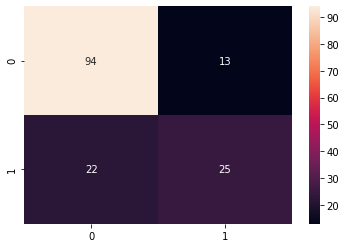

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(Y_test,lr_pred)
cm_rf=confusion_matrix(Y_test,rf_pred)
cm_knn=confusion_matrix(Y_test,knn_pred)
cm_svm=confusion_matrix(Y_test,sv_pred)
cm_nb=confusion_matrix(Y_test,nb_pred)
cm_dt=confusion_matrix(Y_test,dt_pred)
cm_xg=confusion_matrix(Y_test,predictions)
sns.heatmap(cm,annot=True,fmt="d")

<AxesSubplot:>

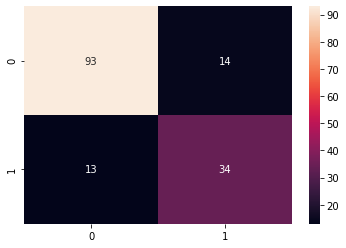

In [31]:
sns.heatmap(cm_rf,annot=True,fmt="d")

<AxesSubplot:>

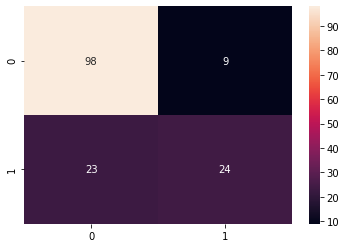

In [32]:
sns.heatmap(cm_svm,annot=True,fmt="d")

<AxesSubplot:>

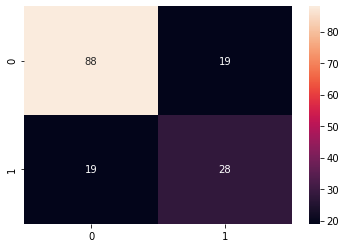

In [33]:
sns.heatmap(cm_knn,annot=True,fmt="d")

<AxesSubplot:>

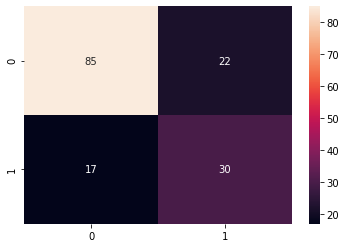

In [34]:
sns.heatmap(cm_dt,annot=True,fmt="d")

<AxesSubplot:>

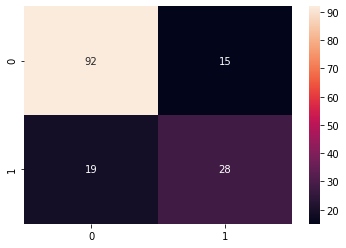

In [35]:
sns.heatmap(cm_nb,annot=True,fmt="d")

<AxesSubplot:>

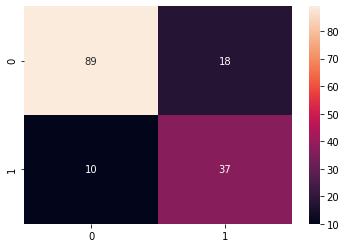

In [36]:
sns.heatmap(cm_xg,annot=True,fmt="d")

In [37]:
from sklearn.metrics import roc_auc_score,roc_curve
print("Accuracy Rate of Logistic Regression: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Missclassification Rate of Logistic Regression: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))
print("Accuracy Rate of Random Forest: {}".format(np.divide(np.sum([cm_rf[0,0],cm_rf[1,1]]),np.sum(cm_rf))*100))
print("Missclassification Rate of Random Forest: {}".format(np.divide(np.sum([cm_rf[0,1],cm_rf[1,0]]),np.sum(cm_rf))*100))
print("Accuracy Rate of XGboost Classification: {}".format(np.divide(np.sum([cm_xg[0,0],cm_xg[1,1]]),np.sum(cm_xg))*100))
print("Missclassification Rate of XGboost Classification: {}".format(np.divide(np.sum([cm_xg[0,1],cm_xg[1,0]]),np.sum(cm_xg))*100))

Accuracy Rate of Logistic Regression: 77.27272727272727
Missclassification Rate of Logistic Regression: 22.727272727272727
Accuracy Rate of Random Forest: 82.46753246753246
Missclassification Rate of Random Forest: 17.532467532467532
Accuracy Rate of XGboost Classification: 81.81818181818183
Missclassification Rate of XGboost Classification: 18.181818181818183


In [38]:
print("Classification report of Logistic Regression:\n",classification_report(Y_test,lr_pred))

Classification report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       107
           1       0.66      0.53      0.59        47

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.76      0.77      0.77       154



In [39]:
print("Classification report of Random Forest:\n",classification_report(Y_test,rf_pred))

Classification report of Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       107
           1       0.71      0.72      0.72        47

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.83      0.82      0.83       154



In [40]:
print("Classification report of XGboost Classification:\n",classification_report(Y_test,predictions))

Classification report of XGboost Classification:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       107
           1       0.67      0.79      0.73        47

    accuracy                           0.82       154
   macro avg       0.79      0.81      0.79       154
weighted avg       0.83      0.82      0.82       154



In [41]:
auc=roc_auc_score(Y_test,lr_pred)
print("ROC AUC score of Logistic Regression is:",auc)
print("ROC AUC score of Random Forest is:",roc_auc_score(Y_test,rf_pred))
print("ROC AUC score of XGboost Classification is:",roc_auc_score(Y_test,predictions))

ROC AUC score of Logistic Regression is: 0.7052097832571087
ROC AUC score of Random Forest is: 0.7962815669119109
ROC AUC score of XGboost Classification is: 0.8095048717438854


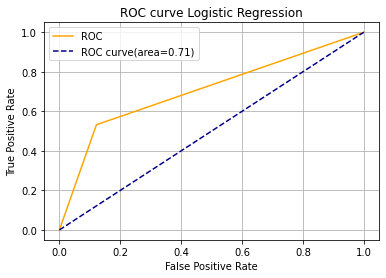

In [42]:
fpr,tpr,thresholds=roc_curve(Y_test,lr_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.2f)' % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve Logistic Regression")
plt.legend()
plt.grid()
plt.show()

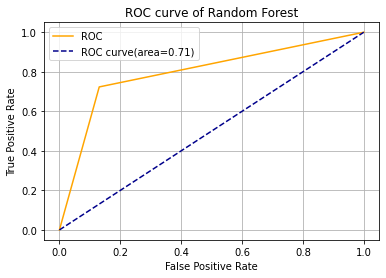

In [43]:
fpr,tpr,thresholds=roc_curve(Y_test,rf_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.2f)' % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of Random Forest")
plt.legend()
plt.grid()
plt.show()

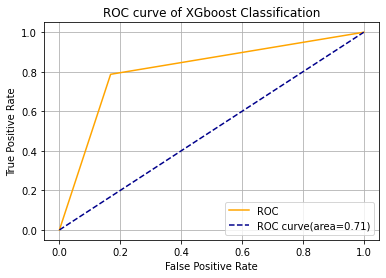

In [44]:
fpr,tpr,thresholds=roc_curve(Y_test,predictions)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.2f)' % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of XGboost Classification")
plt.legend()
plt.grid()
plt.show()

In [46]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [47]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [48]:
clf = XGBClassifier()
random_cv=RandomizedSearchCV(estimator=clf,param_distributions=params,
                             cv=5,n_iter=5,scoring='roc_auc',n_jobs=1,verbose=3,return_train_score=True,random_state=121)
random_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[08:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.1s
[08:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.1s

C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[08:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.1s
[08:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.1s

C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[08:59:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.2s
[08:59:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=10, subsample=0.6; total time=   0.1s
[08:59:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=10, subsample=0.6; total time=   0.2s
[08:59:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=10, subsample=0.6; total time=   0.1s
[08:59:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=10, subsample=0.6; total time=   0.1s

C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[08:59:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=10, subsample=0.6; total time=   0.1s
[08:59:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.2s
[08:59:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.2s
[08:59:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.2s
[08:59:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.2s
[08:59:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.3s
[08:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0; total time=   0.1s
[08:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0; total time=   0.1s
[08:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0; total time=   0.3s
[08:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0; total time=   0.1s
[08:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0; total time=   0.1s
[08:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8; total time=   0.3s
[08:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8; total time=   0.2s
[08:59:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8; total time=   0.1s
[08:59:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8; total time=   0.1s
[08:59:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8; total time=   0.1s
[08:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [49]:
random_cv.best_params_

{'subsample': 1.0,
 'min_child_weight': 10,
 'max_depth': 5,
 'gamma': 5,
 'colsample_bytree': 0.6}

In [50]:
clf = XGBClassifier(colsample_bytree= 0.6,
 gamma= 5,
 max_depth= 5,
 min_child_weight= 10,
 subsample= 1.0)

clf.fit(X_train, Y_train)

[08:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [51]:
clf.score(X_test,Y_test)

0.8311688311688312